In [1]:
import sys
import numpy as np
import cv2
from PIL import Image

In [5]:
#입력 이미지
src = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/circuit.bmp')
#템플릿 이미지
templ = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/crystal.bmp')

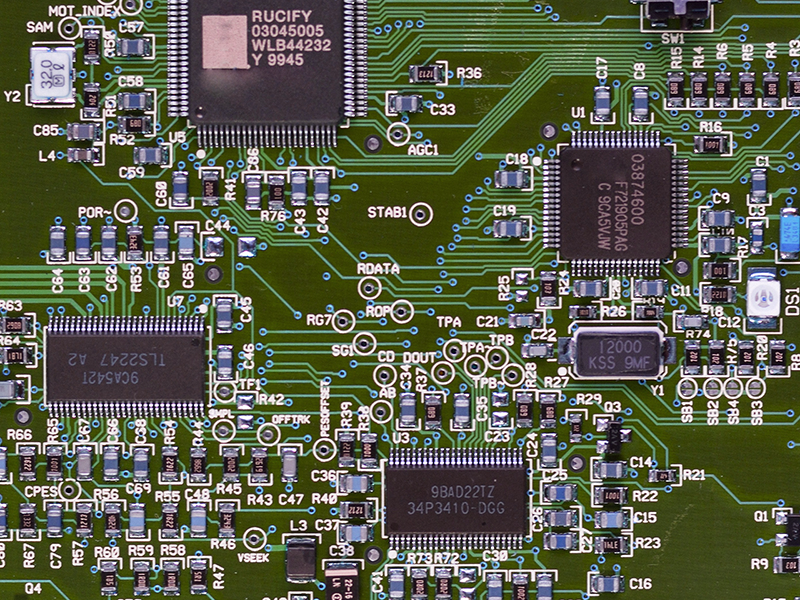

In [6]:
Image.fromarray(src)

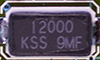

In [7]:
Image.fromarray(templ)

In [11]:
# 입력 영상 밝기 50증가
noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 50, 10)
src = cv2.add(src, noise, dtype=cv2.CV_8UC3)

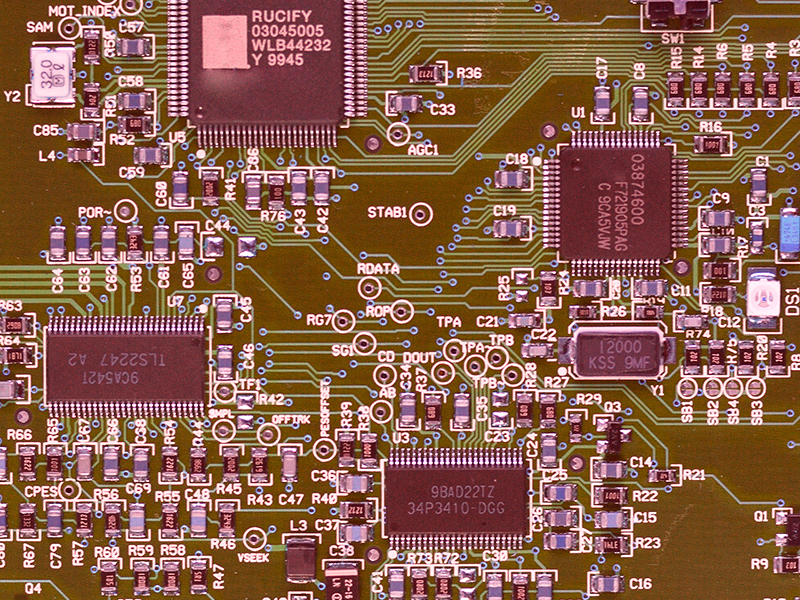

In [12]:
Image.fromarray(src)

In [15]:
# 템플릿 매칭 & 결과 분석
# res의 크기는 (W-w+1, H-h+1)
res = cv2.matchTemplate(src, templ, cv2.TM_CCOEFF_NORMED)
#res의 크기를 0~255로 변경하며 minmax scaler 사용
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

array([[57, 57, 56, ..., 55, 55, 54],
       [53, 53, 52, ..., 54, 53, 52],
       [50, 49, 47, ..., 47, 47, 46],
       ...,
       [60, 60, 62, ..., 42, 42, 42],
       [57, 58, 59, ..., 42, 43, 42],
       [48, 49, 50, ..., 47, 47, 46]], dtype=uint8)

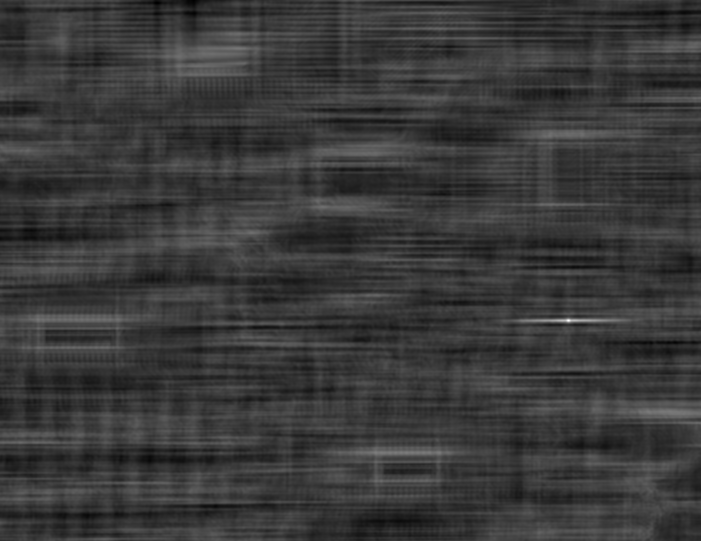

In [51]:
Image.fromarray(res_norm)

In [23]:
_, maxv, _, maxloc = cv2.minMaxLoc(res) # 최대값과 최소값의 위치를 반환
print(maxv)
print(maxloc)

0.9918438792228699
(568, 320)


In [49]:
# 매칭 결과를 빨간색 사각형으로 표시
th, tw = templ.shape[:2]
dst = src
cv2.rectangle(dst, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)

array([[[100,  62,  12],
        [ 95,  60,  12],
        [113,  56,   9],
        ...,
        [124,  77,  62],
        [121,  77,  60],
        [133,  80,  60]],

       [[138,  62,  12],
        [115,  63,  14],
        [103,  62,  11],
        ...,
        [165, 149, 155],
        [160, 149, 152],
        [169, 147, 148]],

       [[125,  63,  15],
        [ 99,  63,  11],
        [ 90,  63,  12],
        ...,
        [174, 174, 187],
        [162, 170, 185],
        [169, 171, 185]],

       ...,

       [[102,  74,  10],
        [ 92,  71,   6],
        [107,  72,  13],
        ...,
        [188, 156, 173],
        [184, 133, 146],
        [150, 110, 125]],

       [[121,  77,  13],
        [107,  73,   8],
        [ 96,  76,  17],
        ...,
        [255, 255, 255],
        [217, 167, 185],
        [146, 104, 136]],

       [[117,  72,  10],
        [122,  77,  14],
        [112,  77,  18],
        ...,
        [200, 138, 162],
        [127,  82, 104],
        [125,  71,  97]]

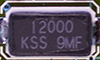

In [52]:
Image.fromarray(templ)

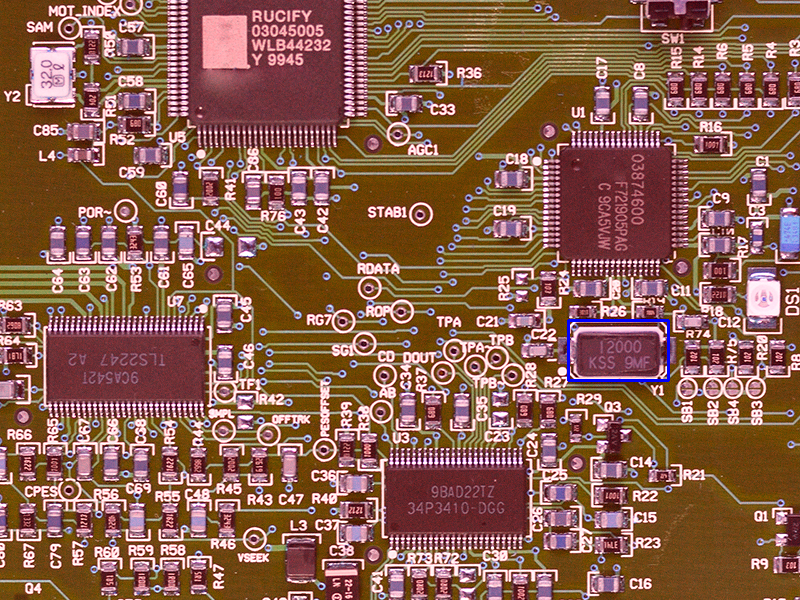

In [50]:
Image.fromarray(dst)